# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0381 Короткина Елизавета, Магнитов Сергей и Сарычева Александра. Вариант №6.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

$H(\omega)$ является передаточной функцией, по которой можно определить отличия характеристик у полиномиальных приближений разного порядка. Данная функция является периодической с периодом $2\pi$. Также передаточную функцию можно определять не только на множестве $\omega$, но и на множестве $f$. Их связь характеризуется следующим равенством: $H(\omega)=H(2\pi f)=\tilde{H}(f)$.

МНК - метод, который часто используется для вывода формул сглаживания полиномов. Он основан на минимизации суммы квадратов отклонений экспериментальных значений от "эталонных". МНК является одним из базовых методов для аппроксимации функций и регрессионного анализа.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$.Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

7. Сделать выводы.

## Выполнение работы


**0. Инициализация данных.**

Загрузка библиотек.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

Инициализация циклической частоты.

In [ ]:
f = np.linspace(0, 0.5, 500)

**1. Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Визуализация графиков $\tilde{H}(f)$.**

Дан входной сигнал:
$$s(t)$$

Необходимо получить на выходе сигнал:
$$y(t)=A+Bt$$

Нужно воспользоваться МНК (приближение по $2m+1$ точкам):
$$F(A, B) = \sum\limits_{k=-m}^{m} (s_k - y_k)^2=\sum\limits_{k=-m}^{m} (s_k - A - Bk)^2 \implies min$$

Для нахождения экстремума необходимо продифференцировать функцию $F(A, B)$ по её аргументам и приравнять уравнения к нулю:
$$\begin{cases}
    \frac{\partial F}{\partial A} = \sum\limits_{k=-m}^{m} 2(s_k - A - Bk)=0 \\
    \frac{\partial F}{\partial B} = \sum\limits_{k=-m}^{m} 2k(s_k - A - Bk)=0   & \quad
  \end{cases}
$$

Далее следует разделить суммы на несколько слагаемых:
 $$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - \sum\limits_{k=-m}^{m}A-\sum\limits_{k=-m}^{m}Bk = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - \sum\limits_{k=-m}^{m}kA - \sum\limits_{k=-m}^{m}Bk^2 = 0
 \end{cases}$$

Затем необходимо решить систему уравнений, преобразуя суммы с помощью выделения элементов, которые не зависят от $k$:
  $$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - (2m+1)A-B\sum\limits_{k=-m}^{m}k = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - A\sum\limits_{k=-m}^{m}k - B\sum\limits_{k=-m}^{m}k^2 = 0
 \end{cases}$$

Так как $\sum\limits_{k=-m}^{m}k=0$, то получается упрощённая система уравнений, откуда несложно выразить коэффициенты $A$ и $B$ :
$$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - (2m+1)A = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - B\sum\limits_{k=-m}^{m}k^2 = 0
 \end{cases}$$

В итоге получаются следующие коэффициенты:
$$\begin{cases}
   A = \frac{\sum\limits_{k=-m}^{m}s_k}{2m+1}\\
   B = \frac{\sum\limits_{k=-m}^{m}ks_k}{\sum\limits_{k=-m}^{m}k^2}
\end{cases}$$

Тогда получится следующая формула:
$$y_0=A=\frac{\sum\limits_{k=-m}^{m}s_k}{2m+1}=\frac{s_{-m}+s_{-m+1}+...+s_{m-1}+s_{m}}{2m+1}$$

В общённом случае формула будет выглядить следующим образом:
$$y_n=A=\frac{\sum\limits_{k=n-m}^{n+m}s_k}{2m+1}=\frac{s_{n-m}+s_{n-m+1}+...+s_{n+m-1}+s_{n+m}}{2m+1}$$

Вводится новая запись:
$$s_n=e^{i\omega n}$$

Тогда для аппроксимации по $2m+1$ точкам формула будет выглядеть:
$$y_n=\frac{e^{-mi\omega} + e^{-(m-1)i\omega}+ ... + 1 + ... + e^{(m-1)i\omega} + e^{mi\omega}}{2m+1} e^{in\omega}=\frac{1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega)}{2m+1}e^{in\omega}=H(\omega)e^{in\omega}$$

Таким образом, формула передаточной функции общем виде:
$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega)}{2m+1}$$

Для 3 точек:
$$H(\omega)=\frac{1+2cos(\omega)}{3}$$

Для 5 точек:
$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$$

Для 7 точек:
$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)}{7}$$

Для 9 точек:
$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$$

Для получения $\widetilde{H}(f)$ необходимо подставить $\omega=2\pi f$.

In [ ]:
def Transfer_Function(f, number_of_points):
  H = 1
  for i in range(1, (number_of_points - 1)//2+1):
    H += 2*np.cos(i*2*np.pi*f)
  return 1/(number_of_points) * H

Text(0, 0.5, '$\\tilde{H}(f)$')

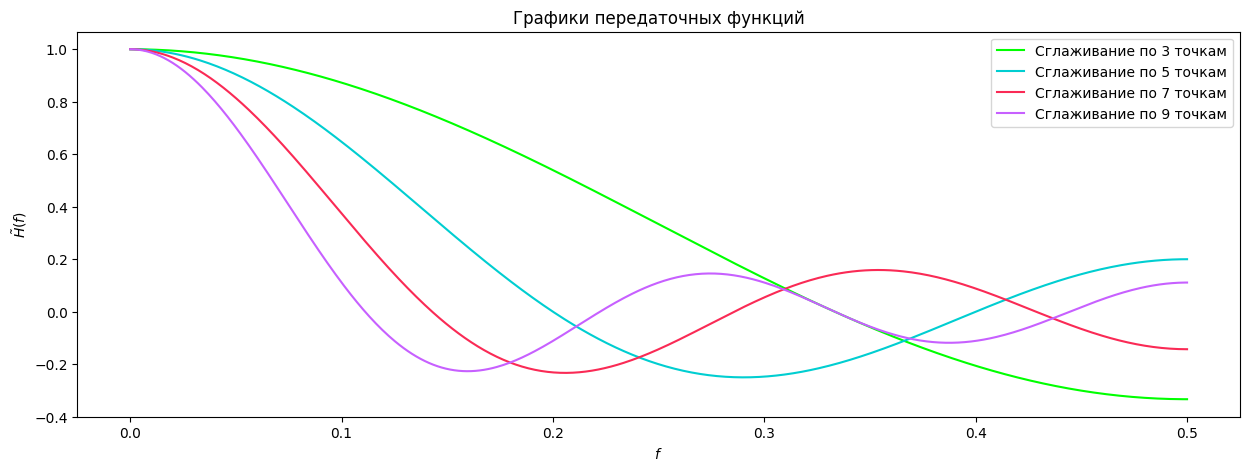

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 3 точкам", "Сглаживание по 5 точкам", "Сглаживание по 7 точкам", "Сглаживание по 9 точкам"]
points = [3, 5, 7, 9]
for i in range(len(points)):
  plt.plot(f, Transfer_Function(f, points[i]), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики передаточных функций")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')


При анализе графиков видно, что с увеличением количества точек при полиномиальном сглаживании увеличивается скорость убывания функции в начальной части оси, а в дальнейшем уменьшается размах колебаний. А также при большем количестве точек амплитуды "волн" становятся меньше, что приводит к более точным результатам передачи сигнала.

**2. Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Визуализация графиков $\tilde{H}(f)$.**

Дан входной сигнал:
$$s(t)$$

Необходимо получить на выходе сигнал:
$$y(t)=A+Bt+Ct^2$$

Нужно воспользоваться МНК (приближение по $2m+1$ точкам):
$$F(A, B) = \sum\limits_{k=-m}^{m} (s_k - y_k)^2=\sum\limits_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 \implies min$$

Для нахождения экстремума необходимо продифференцировать функцию $F(A, B)$ по её аргументам и приравнять уравнения к нулю:
$$\begin{cases}
    \frac{\partial F}{\partial A} = \sum\limits_{k=-m}^{m} 2(s_k - A - Bk-Ck^2)=0 \\
    \frac{\partial F}{\partial B} = \sum\limits_{k=-m}^{m} 2k(s_k - A - Bk-Ck^2)=0   \\
    \frac{\partial F}{\partial C} = \sum\limits_{k=-m}^{m} 2k^2(s_k - A - Bk-Ck^2)=0  
  \end{cases}
$$

Далее следуюет разделить суммы на несколько слагаемых:
 $$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - \sum\limits_{k=-m}^{m}A-\sum\limits_{k=-m}^{m}Bk - \sum\limits_{k=-m}^{m}Ck^2 = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - \sum\limits_{k=-m}^{m}Ak - \sum\limits_{k=-m}^{m}Bk^2 - \sum\limits_{k=-m}^{m}Ck^3 = 0 \\
   \sum\limits_{k=-m}^{m}k^2s_k - \sum\limits_{k=-m}^{m}Ak^2 - \sum\limits_{k=-m}^{m}Bk^3 - \sum\limits_{k=-m}^{m}Ck^4 = 0
 \end{cases}$$

Затем необходимо решить систему уравнений, преобразуя суммы с помощью выделения элементов, которые не зависят от $k$:
$$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - A(2m+1)-B\sum\limits_{k=-m}^{m}k - C\sum\limits_{k=-m}^{m}k^2 = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - A\sum\limits_{k=-m}^{m}k - B\sum\limits_{k=-m}^{m}k^2 - C\sum\limits_{k=-m}^{m}k^3 = 0 \\
   \sum\limits_{k=-m}^{m}k^2s_k - A\sum\limits_{k=-m}^{m}k^2 - B\sum\limits_{k=-m}^{m}k^3 - C\sum\limits_{k=-m}^{m}k^4 = 0
 \end{cases}$$


Так как $\sum\limits_{k=-m}^{m}k=0 \space$ и $\sum\limits_{k=-m}^{m}k^3=0$ , то получается упрощённая система уравнений:
$$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - A(2m+1)- C\frac{m(m+1)(2m+1)}{3} = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - B\sum\limits_{k=-m}^{m}k^2 = 0 \\
   \sum\limits_{k=-m}^{m}k^2s_k - A\frac{m(m+1)(2m+1)}{3} - C\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15} = 0
 \end{cases}$$
В итоге получаются следующие коэффициенты:
$$\begin{cases}
   A = \frac{15\cdot \Big(\frac{3m^2+3m-1}{5}\sum\limits_{k=-m}^{m}s_k - \sum\limits_{k=-m}^{m}k^2s_k\Big)}{(2m-1)(2m+1)(2m+3)}\\
   B = \frac{\sum\limits_{k=-m}^{m}ks_k}{\sum\limits_{k=-m}^{m}k^2}\\
   C = \frac{\sum\limits_{k=-m}^{m}ks_k}{\sum\limits_{k=-m}^{m}k^2}
\end{cases}$$

В общённом случае формула будет выглядить следующим образом:
$$y_n=A=\frac{15\cdot \Big(\frac{3m^2+3m-1}{5}\sum\limits_{k=n-m}^{n+m}s_k - \sum\limits_{k=n-m}^{n+m}k^2s_k\Big)}{(2m-1)(2m+1)(2m+3)}=\frac{15\cdot(\frac{3m^2+3m-1}{5}(s_{n-m}+...+s_{n+m})-(s_{n-1}+s_{n+1})-4(s_{n-2}+s_{n+2})-...-m^2(s_{n-m}+s_{n+m}))}{(2m-1)(2m+1)(2m+3)}$$

Вводится новая запись:
$$s_n=e^{i\omega n}$$

После чего получатся следующие преобразования:
$$y_n= \frac{15\cdot(\frac{3m^2+3m-1}{5}(e^{-im\omega}+...+e^{im\omega})-(e^{-i\omega}+e^{i\omega})-4(e^{-2i\omega}+e^{2i\omega})-...-m^2(e^{-mi\omega}+e^{mi\omega}))}{(2m-1)(2m+1)(2m+3)}e^{ni\omega}$$

Тогда для аппроксимации по $2m+1$ точкам формула будет выглядеть:
$$y_n=\frac{15\cdot(\frac{3m^2+3m-1}{5}(1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega))-2cos(\omega)-4(2cos(2\omega))-...-m^2(2cos(m\omega)))}{(2m-1)(2m+1)(2m+3)}e^{ni\omega}=H(\omega)e^{ni\omega}$$

Таким образом, формула передаточной функции общем виде:
$$H(\omega)=\frac{15\cdot(\frac{3m^2+3m-1}{5}(1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega))-2cos(\omega)-4(2cos(2\omega))-...-m^2(2cos(m\omega)))}{(2m-1)(2m+1)(2m+3)}$$

Для 7 точек:
$$H(\omega)=\frac{7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)}{21}$$

Для 9 точек:
$$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

Для 11 точек:
$$H(\omega)=\frac{89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)}{429}$$

Для 13 точек:
$$H(\omega)=\frac{25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(6\omega)}{143}$$

Для получения $\widetilde{H}(f)$ необходимо подставить $\omega=2\pi f$.

In [ ]:
def Transfer_Function_2(f, number_of_points):
  m = (number_of_points - 1)//2
  sum1 = 0
  sum2 = 1
  for i in range(1, m+1):
    sum1 += i**2 * 2*np.cos(i*2*np.pi*f)
  for i in range(1, m+1):
    sum2 += 2*np.cos(i*2*np.pi*f)
  H = 15*(-sum1 + ((3*m**2 + 3*m - 1)/5)*sum2)/((2*m - 1)*(2*m + 1)*(2*m + 3))
  return H

Text(0, 0.5, '$\\tilde{H}(f)$')

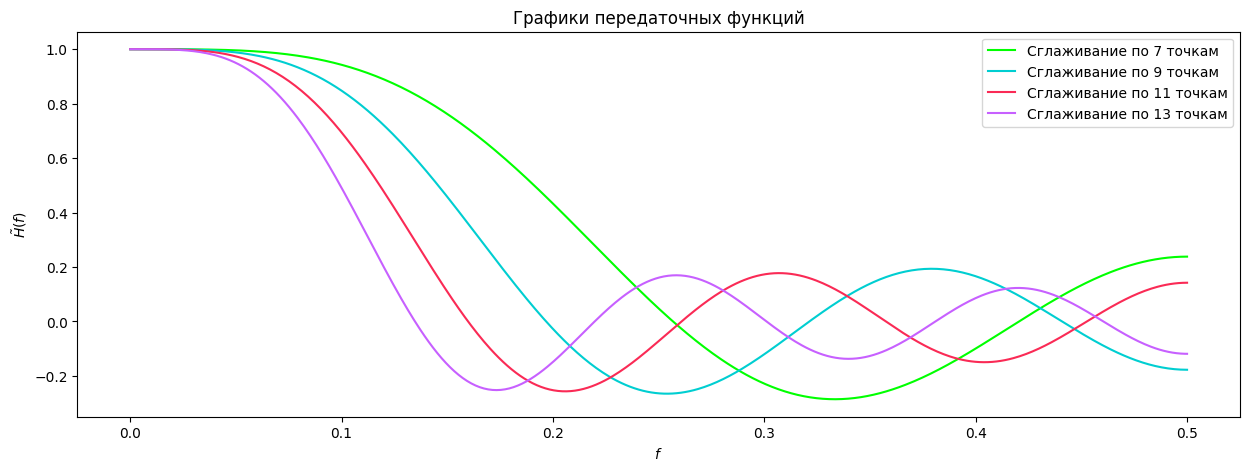

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 7 точкам", "Сглаживание по 9 точкам", "Сглаживание по 11 точкам", "Сглаживание по 13 точкам"]
points = [7, 9, 11, 13]
for i in range(len(points)):
  plt.plot(f, Transfer_Function_2(f, points[i]), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики передаточных функций")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')

Как и в первом пункте, в данном случае были выявлены следующие закономерности: при увеличении количества точек крутизна функции увеличивается, а также растет частота колебаний. Однако, в данном случае квадратичное сглаживание оказывается все-таки более эффективным чем линейное, так как область, которая передает сигнал без искажения становится шире.

**3. Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Визуализация графиков $\tilde{H}(f)$.**

Дан входной сигнал:
$$s(t)$$

Необходимо получить на выходе сигнал:
$$y(t)=A+Bt+Ct^2+Dt^3+Et^4$$

Нужно воспользоваться МНК (приближение по $2m+1$ точкам):
$$F(A, B) = \sum\limits_{k=-m}^{m} (s_k - y_k)^2=\sum\limits_{k=-m}^{m} (s_k - A - Bk - Ck^2-Dk^3-Ek^4)^2 \implies min$$

Для нахождения экстремума необходимо продифференцировать функцию $F(A, B)$ по её аргументам и приравнять уравнения к нулю:
$$\begin{cases}
    \frac{\partial F}{\partial A} = \sum\limits_{k=-m}^{m} 2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0 \\
    \frac{\partial F}{\partial B} = \sum\limits_{k=-m}^{m} 2k(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0   \\
    \frac{\partial F}{\partial C} = \sum\limits_{k=-m}^{m} 2k^2(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \frac{\partial F}{\partial D} = \sum\limits_{k=-m}^{m} 2k^3(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  \\
    \frac{\partial F}{\partial E} = \sum\limits_{k=-m}^{m} 2k^4(s_k - A - Bk - Ck^2-Dk^3-Ek^4)=0  
  \end{cases}
$$

Далее следуюет разделить суммы на несколько слагаемых:
 $$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k - \sum\limits_{k=-m}^{m}A-\sum\limits_{k=-m}^{m}Bk - \sum\limits_{k=-m}^{m}Ck^2 - \sum\limits_{k=-m}^{m}Dk^3 - \sum\limits_{k=-m}^{m}Ek^4 = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - \sum\limits_{k=-m}^{m}Ak - \sum\limits_{k=-m}^{m}Bk^2 - \sum\limits_{k=-m}^{m}Ck^3 - \sum\limits_{k=-m}^{m}Dk^4 - \sum\limits_{k=-m}^{m}Ek^5 = 0 \\
   \sum\limits_{k=-m}^{m}k^2s_k - \sum\limits_{k=-m}^{m}Ak^2 - \sum\limits_{k=-m}^{m}Bk^3 - \sum\limits_{k=-m}^{m}Ck^4- \sum\limits_{k=-m}^{m}Dk^5 - \sum\limits_{k=-m}^{m}Ek^6 = 0 \\
   \sum\limits_{k=-m}^{m}k^3s_k - \sum\limits_{k=-m}^{m}Ak^3 - \sum\limits_{k=-m}^{m}Bk^4 - \sum\limits_{k=-m}^{m}Ck^5- \sum\limits_{k=-m}^{m}Dk^6 - \sum\limits_{k=-m}^{m}Ek^7 = 0 \\
   \sum\limits_{k=-m}^{m}k^4s_k - \sum\limits_{k=-m}^{m}Ak^4 - \sum\limits_{k=-m}^{m}Bk^5 - \sum\limits_{k=-m}^{m}Ck^6- \sum\limits_{k=-m}^{m}Dk^7 - \sum\limits_{k=-m}^{m}Ek^8 = 0
 \end{cases}$$

Затем необходимо простить систему уравнений:
 $$\begin{cases}
   \sum\limits_{k=-m}^{m}s_k -A(2m+1) - C\frac{m(m + 1)(2m + 1)}{3} - E\frac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15} = 0 \\
   \sum\limits_{k=-m}^{m}ks_k - B\frac{m(m + 1)(2m + 1)}{3} - D\frac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15} = 0 \\
   \sum\limits_{k=-m}^{m}k^2s_k - A\frac{m(m + 1)(2m + 1)}{3} - C\frac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15} - E\frac{m(m+1)(2m+1)(3m^4+6m^3-3m+1)}{21} = 0 \\
   \sum\limits_{k=-m}^{m}k^3s_k - B\frac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15} - D\frac{m(m+1)(2m+1)(3m^4+6m^3-3m+1)}{21} = 0 \\
   \sum\limits_{k=-m}^{m}k^4s_k - A\frac{m(m + 1)(2m + 1)(3m^2 + 3m -1)}{15} - C\frac{m(m+1)(2m+1)(3m^4+6m^3-3m+1)}{21} - E\frac{m(m+1)(2m+1)(5m^6+15m^5+5m^4-15m^3-m^2+9m-3)}{45} = 0
 \end{cases}$$

Для дальнейших расчётов был выведен коэффициент $A$ из системы:
$$A = \frac{3((75m^4+150m^3-175m^2-250m+60)\sum\limits_{k=-m}^{m}s_k-175(2m^2+2m-3) \sum\limits_{k=-m}^{m}k^2s_k+315 \sum\limits_{k=-m}^{m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}$$

В общённом случае формула будет выглядить следующим образом:
$$y_n=A=\frac{3((75m^4+150m^3-175m^2-250m+60)\sum\limits_{k=n-m}^{n+m}s_k-175(2m^2+2m-3) \sum\limits_{k=n-m}^{n+m}ks_k+315 \sum\limits_{k=n-m}^{n+m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}$$

Вводится новая запись:
$$s_n=e^{i\omega n}$$

После чего получатся следующие преобразования:
$$y_n= \frac{3((75m^4+150m^3-175m^2-250m+60)(e^{-mi\omega}+...+e^{mi\omega})-175(2m^2+2m-3)((e^{-i\omega}+e^{i\omega})+4(e^{-2i\omega}+e^{2i\omega})+...+m^2(e^{-mi\omega}+e^{mi\omega}))+315((e^{-i\omega}+e^{i\omega})+16(e^{-2i\omega}+e^{2i\omega})+...+m^4(e^{-mi\omega}+e^{mi\omega})))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}e^{ni\omega}$$

Тогда для аппроксимации по $2m+1$ точкам формула будет выглядеть:
$$y_n=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2cos(m\omega))-175(2m^2+2m-3)(2cos(\omega)+...+2m^2cos(m\omega))+315(2cos(\omega)+...+2m^4cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}e^{ni\omega}=H(\omega)e^{ni\omega}$$

Таким образом, формула передаточной функции общем виде:
$$H(\omega)=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2cos(m\omega))-175(2m^2+2m-3)(2cos(\omega)+...+2m^2cos(m\omega))+315(2cos(\omega)+...+2m^4cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2m+5)}$$

Для 9 точек:
$$H(\omega) = \frac{179 + 270 cos(\omega) + 60 cos(2\omega) − 110 cos(3\omega)+ 30cos(4\omega)}{429}$$

Для 11 точек:
$$H(\omega) = \frac{143 + 240 cos(\omega) + 120 cos(2\omega) − 20 cos(3\omega) - 90 cos(4\omega) + 36 cos(5\omega)}{429}$$

Для 13 точек:
$$H(\omega) = \frac{677 + 1200cos(\omega) + 780 cos(2\omega) + 220 cos(3\omega) - 270 cos(4\omega) - 396 cos(5\omega) + 220cos(6\omega)}{2434}$$

Для 15 точек:
$$H(\omega) = \frac{11063 + 20250 cos(\omega) + 15000 cos(2\omega)+ 7510 cos(3\omega) − 330 cos(4\omega) − 5874 cos(5\omega) + 5720 cos(6\omega) + 4290 cos(7\omega)}{46189}$$

Для получения $\widetilde{H}(f)$ необходимо подставить $\omega=2\pi f$.

In [ ]:
def Transfer_Function_4(f, number_of_points):
  m = (number_of_points - 1)//2
  sum1 = 1
  sum2 = 0
  sum3 = 0
  for i in range(1, m+1):
    sum1 += 2*np.cos(i*2*np.pi*f)
  for i in range(1, m+1):
    sum2 += i**2 *2*np.cos(i*2*np.pi*f)
  for i in range(1, m+1):
    sum3 += i**4 *2*np.cos(i*2*np.pi*f)

  sum1 = (75*m**4 + 150*m**3 - 175*m**2 - 250*m + 60)*sum1
  sum2 = -175*(2*m**2+2*m-3)*sum2
  sum3 = 315*sum3
  denominator = 4*(2*m+3)*(2*m+1)*(2*m-1)*(2*m-3)*(2*m+5)
  H = 3*(sum1+sum2+sum3)/denominator
  return H

Text(0, 0.5, '$\\tilde{H}(f)$')

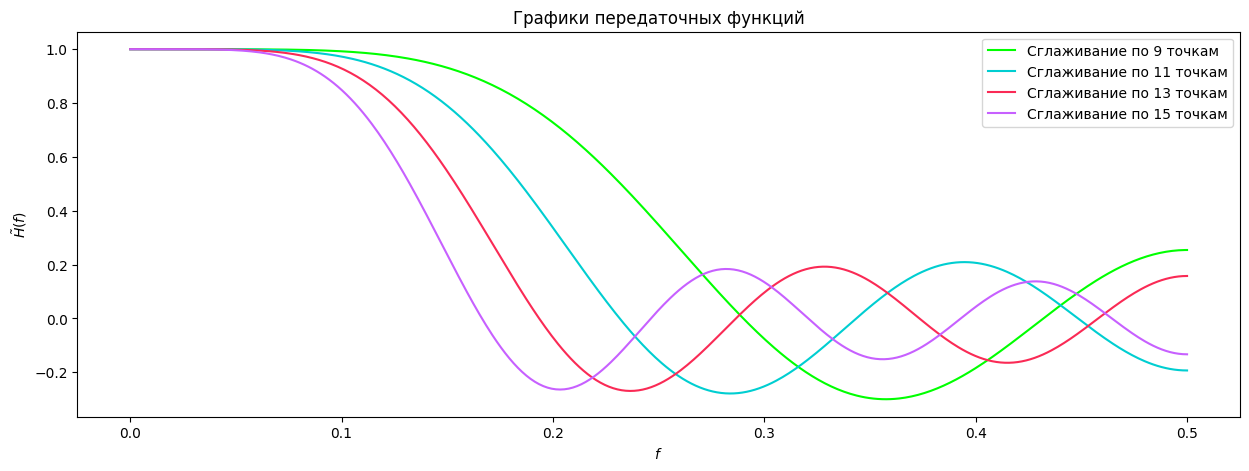

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 9 точкам", "Сглаживание по 11 точкам", "Сглаживание по 13 точкам", "Сглаживание по 15 точкам"]
points = [9, 11, 13, 15]
for i in range(len(points)):
  plt.plot(f, Transfer_Function_4(f, points[i]), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики передаточных функций")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')

Тенденция увеличения крутизны и уменьшения амплитуды колебания совпадает с результатами из прошлых пунктов. Также можно сделать вывод, что область передачи сигнала без шумов достаточно велика, поэтому эффективность передачи сигнала будет ещё выше.

**4. Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Визуализация графиков $\tilde{H}(f)$.**

Формулы Спенсера говорят о следующем сглаживании:
$$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$$

$$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10})$$

Вводится новая запись:
$$s_n=e^{i\omega n}$$

Формулы преобразуются в следующий вид:
$$y_n = \frac{1}{320}(-3e^{-7i\omega} - 6e^{-6i\omega} - 5e^{-5i\omega} + 3e^{-4i\omega} + 21e^{-3i\omega} + 46e^{-2i\omega} - 67e^{-i\omega} + 74 + 67e^{i\omega} + 46e^{2i\omega} + 21e^{3i\omega} + 3e^{4i\omega} - 5e^{5i\omega} - 6e^{6i\omega} - 3e^{7i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$

$$y_n = \frac{1}{350}(-e^{-10i\omega} - 6e^{-9i\omega} - 5e^{-8i\omega} - 5e^{-7i\omega} - 2e^{-6i\omega} + 6e^{-5i\omega} + 18e^{-4i\omega} + 33e^{-3i\omega} + 47e^{-2i\omega} + 57e^{-i\omega} + 60 + 57e^{i\omega} + 47e^{2i\omega} + 33e^{3i\omega} + 18e^{4i\omega} + 6e^{5i\omega} - 2e^{6i\omega} - 5e^{7i\omega} -5e^{8i\omega} -3e^{9i\omega} - e^{10i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$

Таким образом, передаточные функции имеют следующий вид соответственно:
$$H_{15}(\omega) = \frac{1}{320}(-6cos(7\omega) - 12cos(6\omega) - 10cos(5\omega) + 6cos(4\omega) + 42cos(3\omega) + 92cos(2\omega) + 134cos(\omega)+ 74)$$

$$H_{21}(\omega) = \frac{1}{350}(-2cos(10\omega) - 6cos(9\omega) - 10cos(8\omega) - 10cos(7\omega) - 4cos(6\omega) + 12cos(5\omega) + 36cos(4\omega) + 66cos(3\omega) + 94cos(2\omega) + 114cos(\omega) + 60)$$

Для получения $\widetilde{H}(f)$ необходимо подставить $\omega=2\pi f$.




In [ ]:
def H15(f):
  H = 1/320 *(74 + 134*np.cos(2*np.pi*f)+ 92*np.cos(2*2*np.pi*f) + 42*np.cos(3*2*np.pi*f) + 6*np.cos(4*2*np.pi*f) - 10*np.cos(5*2*np.pi*f) - 12*np.cos(6*2*np.pi*f) -6*np.cos(7*2*np.pi*f))
  return H

def H21(f):
  H = 1/350 *(60 + 114*np.cos(2*np.pi*f) + 94*np.cos(2*2*np.pi*f) + 66*np.cos(3*2*np.pi*f) + 36*np.cos(4*2*np.pi*f) + 12*np.cos(5*2*np.pi*f) - 4*np.cos(6*2*np.pi*f) - 10*np.cos(7*2*np.pi*f) - 10*np.cos(8*2*np.pi*f) - 6*np.cos(9*2*np.pi*f) - 2*np.cos(10*2*np.pi*f))
  return H

Text(0, 0.5, '$\\tilde{H}(f)$')

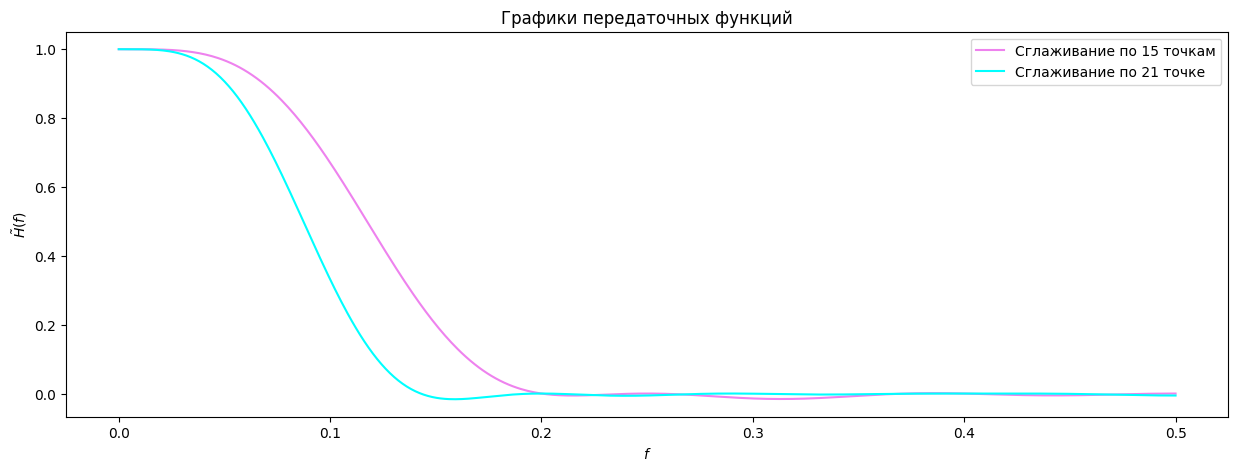

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(f, H15(f), color="violet", label="Сглаживание по 15 точкам")
plt.plot(f, H21(f), color="aqua", label="Сглаживание по 21 точке")
plt.legend()
plt.title("Графики передаточных функций")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f)$')

В данном случае крутизна спада функции самая сильная из всех рассмотренных случаев. А колебания имеют самую маленькую амплитуду. При сравнении этих двух методов можно сделать вывод, что сглаживание по 21 точке обладает более сильной крутизной и большей частотой колебаний. Для более тщательного анализа данные графики должны быть рассмотрены в логарифмической шкале.

**5. Построение графиков из предыдущих пунктов в логарифмической шкале (Дб).**

Известно, что значение в $ДБ=20lg \Big(\frac{|y_n|}{|s_n|} \Big)$.

Text(0, 0.5, '$\\tilde{H}(f), ДБ$')

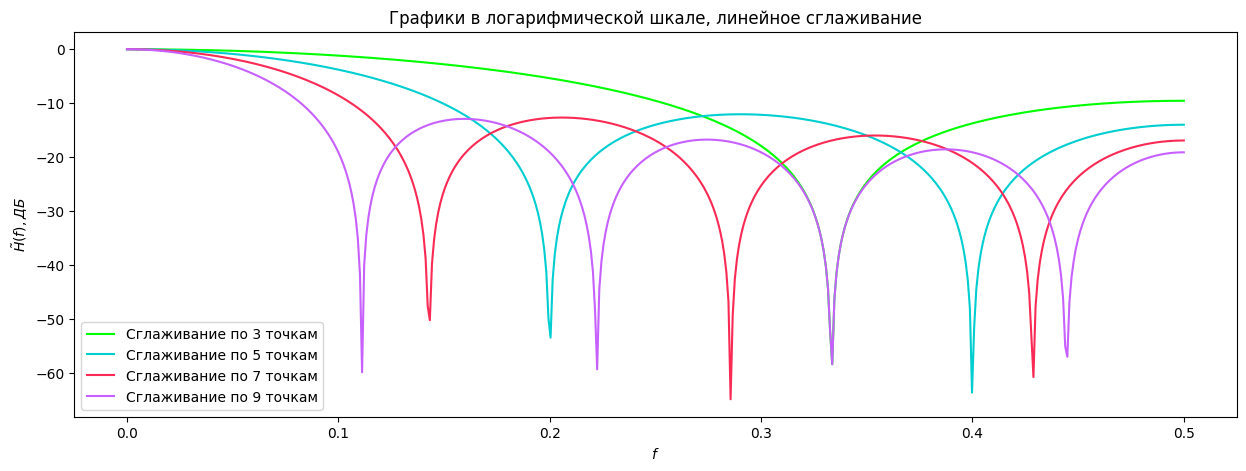

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 3 точкам", "Сглаживание по 5 точкам", "Сглаживание по 7 точкам", "Сглаживание по 9 точкам"]
points = [3, 5, 7, 9]
for i in range(len(points)):
  plt.plot(f, 20*np.log10(np.abs(Transfer_Function(f, points[i]))), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики в логарифмической шкале, линейное сглаживание")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f), ДБ$')

Text(0, 0.5, '$\\tilde{H}(f), ДБ$')

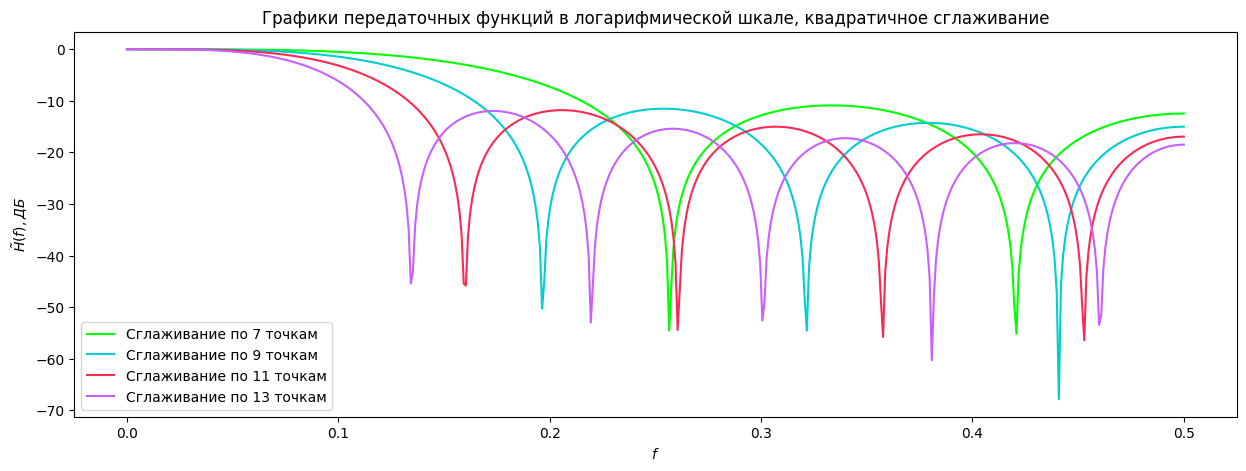

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 7 точкам", "Сглаживание по 9 точкам", "Сглаживание по 11 точкам", "Сглаживание по 13 точкам"]
points = [7, 9, 11, 13]
for i in range(len(points)):
  plt.plot(f, 20*np.log10(np.abs(Transfer_Function_2(f, points[i]))), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики передаточных функций в логарифмической шкале, квадратичное сглаживание")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f), ДБ$')

Text(0, 0.5, '$\\tilde{H}(f), ДБ$')

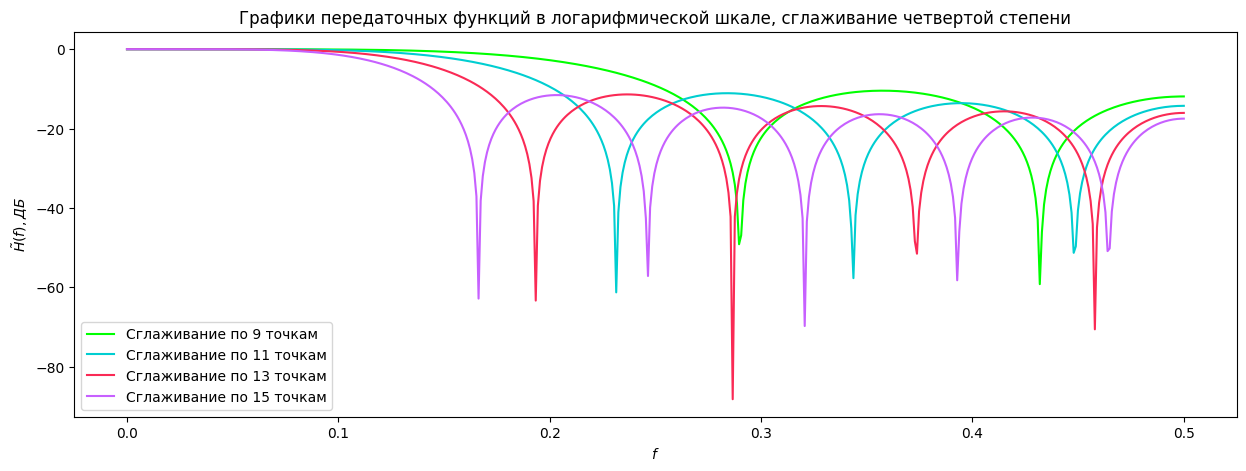

In [ ]:
plt.figure(figsize=(15, 5))

my_color = ["lime", "darkturquoise", "#fa2a55", "#c760ff"]
labels = ["Сглаживание по 9 точкам", "Сглаживание по 11 точкам", "Сглаживание по 13 точкам", "Сглаживание по 15 точкам"]
points = [9, 11, 13, 15]
for i in range(len(points)):
  plt.plot(f, 20*np.log10(np.abs(Transfer_Function_4(f, points[i]))), color=my_color[i], label=labels[i])
plt.legend()
plt.title("Графики передаточных функций в логарифмической шкале, сглаживание четвертой степени")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f), ДБ$')

Text(0, 0.5, '$\\tilde{H}(f), ДБ$')

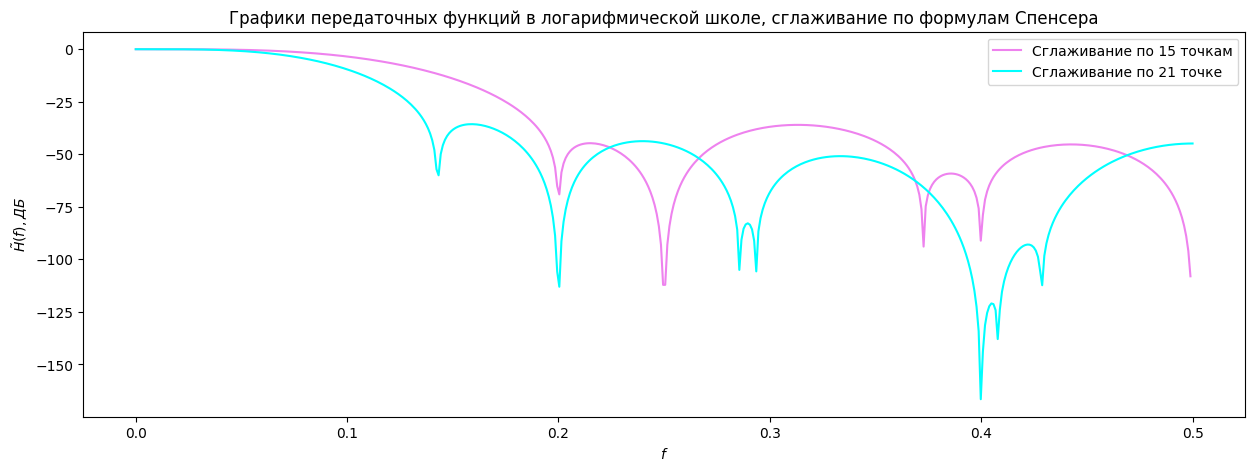

In [ ]:
plt.figure(figsize=(15, 5))
warnings.filterwarnings('ignore')
plt.plot(f, 20*np.log10(np.abs(H15(f))), color="violet", label="Сглаживание по 15 точкам")
plt.plot(f, 20*np.log10(np.abs(H21(f))), color="aqua", label="Сглаживание по 21 точке")
plt.legend()
plt.title("Графики передаточных функций в логарифмической школе, сглаживание по формулам Спенсера")
plt.xlabel('$f$')
plt.ylabel(r'$\tilde{H}(f), ДБ$')

На основании графиков передаточных функций в логарифмической шкале можно сделать вывод о подавлении высокочастотных шумов. Таким образом, благодаря функциям часть шумов можно устранить и получить корректный сигнал. Графики в логарифмической шкале являются более удобными для анализа, поскольку более явно отражают частотные характеристики, которые могут быть не так хорошо различимы у сигналов с маленькой амплитудой колебаний.

**6. Сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.**

После исследования различных методов полиномиального приближения можно прийти к следующим выводам. Во-первых, графики периодичны, что подтверждается теорией, поэтому для того, чтобы была лучше видна разница между методами, визуализирована первая половина периода (во второй половине график отзеркаливается).  Во-вторых, при увеличении степени полинома для сглаживания возрастает точность приближения, т.е. увеличивается область, в которой сигнал будет передан без искажения. Таким образом, чем выше степень сглаживания, тем лучше. Количество точек приближений также влияет на точность передачи сигнала. Чем больше их количество, тем меньше искажается сигнал. А формулы Спенсера позволяют устранять высокочастотные шумы.

## Выводы

Во время выполнения практической работы был проведён анализ частотных характеристик формул полиномиального сглаживания. Были изучены следующие методы сглаживания: линейный, квадратичный, четвертой степени. Помимо этого были изучены формулы Спенсера для сглаживания полинома по 15 и 21 точкам. Для каждого случая были выведены формулы передаточных функций в обобщенном и частном виде. Также созданы графики передаточных функций в логарифмической шкале. Проведён сравнительный анализ исследованных методов сглаживания.